##  Máquinas de soporte vectorial
(Apuntes provienen del libro  https://phuijse.github.io/MachineLearningBook) 

Una máquina de soporte vectorial (*support vector machine, SVM*) es un modelo de aprendizaje supervisado que busca un hiperplano óptimo 

$$
h(x) = \langle w, x \rangle + b
$$

para separar un conjunto de datos

$$
D = \{(x_1, y_1), (x_2, y_2), \ldots (x_N, y_N)\}
$$

donde $x_i \in \mathbb{R}^M$ con etiquetas $y_i \in \{-1, +1\}$.

Considere los siguientes hiperplanos separadores:

<img src="img/svm1.png" width="500">

Para la SVM el hiperplano óptimo es el de más a la derecha: aquel que tiene **máximo margen**.

Margen ($\tau$)
: Distancia del hiperplano a la muestra más cercana

A continuación veremos el problema de optimización planteado por la SVM para obtener el hiperplano óptimo.



## Formulación primal de la SVM

La formulación primal se obtiene definiendo las siguientes condiciones:

- Para $y_i = +1$ se tiene $\langle w, x_i \rangle + b \geq 1$
- Para $y_i = -1$ se tiene $\langle w, x_i \rangle + b \leq 1$

que pueden escribirse como de forma resumida como

$$
y_i \left(\langle w, x_i \rangle + b\right) \geq 1
$$

donde llamamos **vectores de soporte** a los ejemplos $(x_i, y_i)$ que cumplen con

$$
y_i \left(\langle w, x_i \rangle + b\right) = 1
$$



>Los vectores de soporte definen el hiperplano separador.


<img src="img/svm2.png" width="400">

La figura muestra un hiperplano (linea negra) que separa datos de dos clases representados por puntos verdes y rojos, respectivamente.

- El ejemplo $x_1$ es un vector de soporte asociado a la clase $-1$
- Los ejemplos $x_2$, $x_3$ y $x_4$ son vectores de soporte de la clase $+1$
- El margen entre el hiperplano y los vectores de soporte es $\tau = \frac{1}{\|w\|}$

Considerando las ecuaciones anteriores como restricciones y planteando el objetivo de maximizar el margen se tiene la formulación primal de la SVM:

$$
\begin{split}
\min_{w,b} &\frac{1}{2}\|w\|^2 \\
\text{sujeto a: }& y_i \left(\langle w, x_i \rangle + b\right) \geq 1,  \forall i
\end{split}
$$

Este problema se resuelve utilizando multiplicadores de Lagrange.

**Ejercicio 1:** Plantee las restricciones de la formulación primal para los datos de la figura anterior y despeje el valor de $w$ y $b$. Solución: $w= (1,1)$ y $b=-1$.

## Formulación dual de la SVM

A partir de la formulación primal podemos definir el lagrangiano como

$$
L(w, b, \alpha) = \frac{1}{2}\|w\|^2 - \sum_{i=1}^N \alpha_i \left [ y_i \left(\langle w, x_i \rangle + b\right) - 1 \right]
$$

donde $\alpha_i$ son los multiplicadores de Lagrange.

Derivando en función de $w$ y $b$ e igualando a cero tenemos

$$
\sum_{i=1}^N \alpha_i y_i = 0
$$

y

$$
w = \sum_{i=1}^N \alpha_i y_i x_i
$$


Reemplazando esta definición de $w$ en el lagrangiano se obtiene la formulación dual de la SVM:

$$
\begin{split}
\max_\alpha \sum_{i=1}^N \alpha_i - &\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j\langle x_i, x_j \rangle \\
\text{sujeto a:} &\sum_{i=1}^N \alpha_i y_i = 0 \\
&\alpha_i \geq 0, \forall i
\end{split}
$$

Por otra parte el hiperplano dual es 

$$
h(x) = \sum_{i=1}^N \alpha_i y_i \langle x, x_i \rangle + b 
$$

donde

$$
b = y_k - \langle w, x_k \rangle
$$

para algún $k$ tal que $\alpha_k > 0$.


>
> Los vectores de soporte son los ejemplos donde $\alpha_i > 0$. En cambio para los ejemplos que no son vectores de soporte se tiene $\alpha_i=0$
>


**Ejercicio 2:** Considere el dataset que se muestra en la siguiente figura:

<img src="img/svm3.png" width="300">

donde se han demarcado los vectores de soporte y el hiperplano de máxima separación. Obtenga los parámetros del hiperplano separador utilizando la formulación primal y luego la dual.

## Margen relajado de la SVM

Las formulaciones anteriores no consideran el caso en que existan errores, es decir ejemplos que quedan del lado contrario de la frontera de decisión.

Llamamos a estos ejemplos **no separables** y les asignamos una variable de compensación $\xi$ como muestra la siguiente figura:

<img src="img/svm4.png" width="300">

Con las variables de compensación, la formulación primal de la SVM cambia a:

$$
\begin{split}
\min_{w,b} &\frac{1}{2}\|w\|^2  + C \sum_{i=1}^N \xi_i \\
\text{sujeto a: }& y_i \left(\langle w, x_i \rangle + b\right) \geq 1 - \xi_i,  \forall i \\
&\xi_i \geq 0, \forall i
\end{split}
$$

donde se ha agregado $C>0$ que pondera la regularización de la función de costo. 



>El hiperparámetro $C$ controla el trade-off entre la minimización del margen y la cantidad de ejemplos mal clasificados

- Un valor grande de $C$ privilegia un hiperplano de margen pequeño con pocos errores
- Un valor pequeño de $C$ privilegia un hiperplano de gran margen con muchos errores



<img src="img/svm6.png" width="500">

Si consideramos $C$ la formulación dual cambia a:

$$
\begin{split}
\max_\alpha \sum_{i=1}^N \alpha_i - &\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j\langle x_i, x_j \rangle \\
\text{sujeto a:} &\sum_{i=1}^N \alpha_i y_i = 0 \\
&C > \alpha_i \geq 0, \forall i
\end{split}
$$

## 

Transformación no lineal de los datos

La SVM es capaz de encontrar fronteras lineales (hiperplanos) para separar los datos de entrenamiento, pero 

> ¿Qué ocurre si en primer lugar nuestros datos no son linealmente separables?

Considere el siguiente ejemplo donde las clases se agrupan aproximadamente como dos circulos concéntricos:

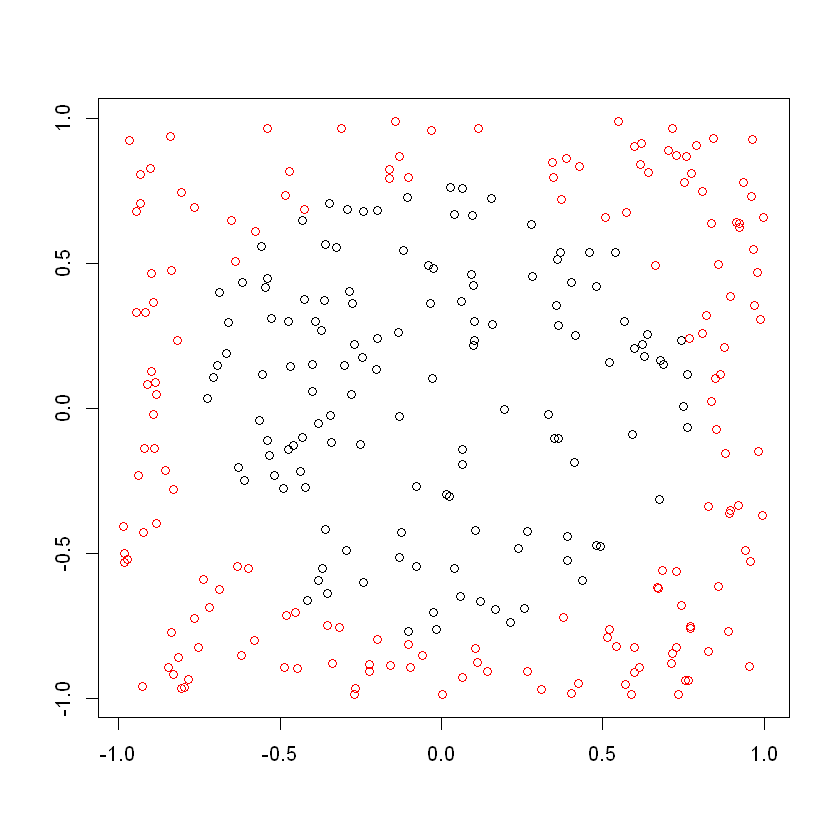

In [1]:
#install.packages("mlbench")

library(mlbench)
p<-mlbench.circle(300,2) 
plot(p)


Esta figura muestra los datos en su espacio original (dos dimensiones). Claramente no es posible separarlos con un hiperplano.

Considere ahora la siguiente transformación no lineal $\phi: \mathbb{R}^2 \to \mathbb{R}^3$ definida como

$$
\phi(x) = (x_1, x_2, x_1^2 + x_2^2)
$$

In [2]:
x <- p$x[,1]
y <- p$x[,2]
z <- x**2 + y**2

In [2]:
#install.packages("rgl")
library(rgl)
options(rgl.useNULL=TRUE)
open3d()
plot3d(x,y,z,col=p$classes)
rglwidget()

null 
   1

Loading required namespace: rmarkdown


HTML widgets cannot be represented in plain text (need html)


Esta figura muestra los datos en el espacio transformado (tres dimensiones). En este espacio si se pueden separar por un hiperplano.


>Generalmente es más fácil encontrar hiperplanos separadores (lineales) en espacios aumentados. El hiperplano en el espacio aumentado corresponde a una frontera no lineal en el espacio de entrada.



## Kernels y SVM

Un kernel ([definido positivo](https://es.wikipedia.org/wiki/Matriz_definida_positiva)) es un producto interno en un espacio de características implícito y generalmente de alta dimensionalidad.

Un kernel $\kappa: \mathcal{X} \times \mathcal{X} \to \mathbb{R}$ cumple lo siguiente

$$
\kappa(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle
$$

donde $\phi$ es una transformación no lineal que es inducida por el kernel


>La ecuación anterior se conoce como el **truco del kernel**


Veamos dos kernels ampliamente utilizados. El primero es el kernel polinomial con hiperparámetros $c_0$, $d$ y $\gamma>0$

$$
\kappa(x_i, x_j) = (c_0 + \gamma \langle x_i, x_j \rangle)^d
$$


Por ejemplo para $d=2$, $c_0=1$, $\gamma=1$ y $x_i \in \mathbb{R}$ este kernel induce una transformación no lineal

$$
\begin{split}
\kappa(x_i, x_j) &= (1 + x_i x_j)^2 = 1 + 2 x_i x_j + x_i^2 x_j^2 \\&= \left\langle \begin{pmatrix} 1\\ \sqrt{2} x_i \\ x_i^2 \end{pmatrix}, \begin{pmatrix} 1\\ \sqrt{2} x_j \\ x_j^2 \end{pmatrix} \right\rangle
\end{split}
$$

El segundo es el kernel gaussiano o RBF (*radial basis function*) con hiperparámetro $\gamma>0$

$$
\kappa(x_i, x_j) = \exp \left(-\gamma \| x_i -  x_j \|^2 \right),
$$

cuyo transformación no lineal inducida es

$$
\begin{split}
\kappa(x_i, x_j) &= \exp \left(-\gamma \| x_i\|^2 \right) \exp \left(-\gamma \| x_j\|^2 \right) \exp \left(\gamma \langle x_i, x_j \rangle \right) \\
&= \exp \left(-\gamma \| x_i\|^2 \right) \exp \left(-\gamma \| x_j\|^2 \right) \sum_{k=1}^\infty  \frac{\left(\gamma \langle x_i, x_j \rangle \right)^k}{k!} 
\end{split}
$$

> El espacio inducido por el kernel RBF es de dimensionalidad infinita


>Controlando $\gamma$ es muy fácil obtener un espacio donde los datos sean linealmente separables, sin embargo esto puede inducir a sobreajuste, como muestra la siguiente figura





<img src="img/svm5.png" width="500">


- En la subfigura izquierda se ha utilizado un valor de $\gamma$ pequeño (hiperplano poco flexible)
- En la subfigura derecha se ha utilizado un valor de $\gamma$ grande (hiperplano muy flexible)



>Cuando utilizamos kernels, el hiperparámetro $C$ cobra mayor relevancia. Utilizando un valor de $C$ pequeño privilegiamos un hiperplano más suave (menos complejo) con margen ancho (regularización).


>Los hiperparámetros de la SVM, como $\gamma$ y $C$, son sensibles. Debemos calibrarlos utilizando técnicas de validación.


Utilizando el **truco del kernel** no es necesario conocer la transformación no lineal $\phi$. Basta reemplazar $\langle \phi(x_i), \phi(x_j) \rangle$ por $\kappa(x_i, x_j)$ en la formulación dual de la SVM como se muestra a continuación:

$$
\begin{split}
\max_\alpha \sum_{i=1}^N \alpha_i - &\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j \kappa(x_i, x_j)\\
\text{sujeto a:} &\sum_{i=1}^N \alpha_i y_i = 0 \\
&C > \alpha_i \geq 0, \forall i
\end{split}
$$

y el hiperplano utilizando kernels es:

$$
h(x) = \sum_{i=1}^N \alpha_i y_i \kappa(x, x_i) + b 
$$

## SVM para clasificación con la biblioteca e1071 de R
El método svm de la biblioteca e1071 nos permite ajustar el modelo

**Ejercicio 3:** 
1) Describa los principales parámetros y salidas del métod svm
2) Pruebe distintos valores para los parámetros con los datos ilustrativos, interprete y concluya

In [4]:
library(e1071)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  270



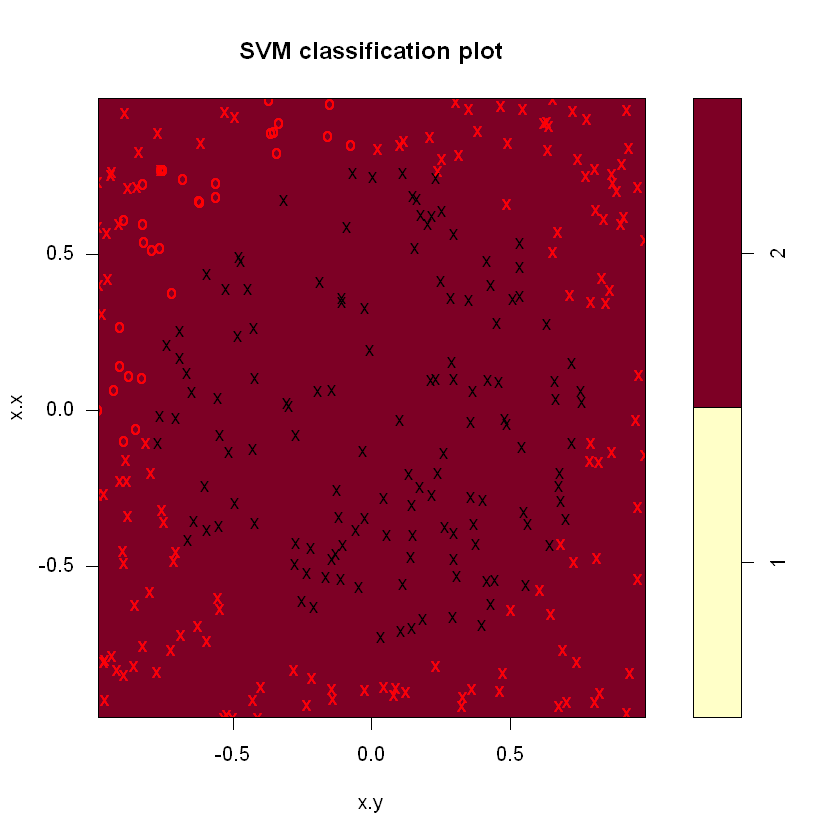

In [5]:
dat = data.frame(x=cbind(x,y), y = p$classes)
svmfit = svm(y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)
print(svmfit)
plot(svmfit, dat)


Call:
svm(formula = y ~ ., data = dat, kernel = "radial", gamma = 0.1, 
    cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.1 

Number of Support Vectors:  140



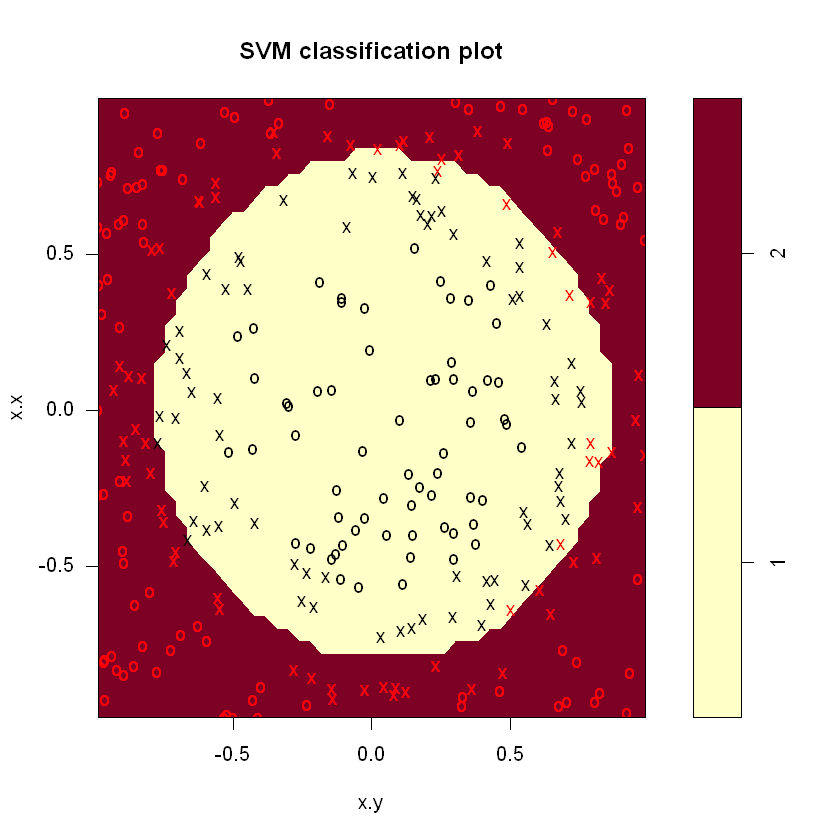

In [6]:

svmfit = svm(y ~ ., data = dat, kernel = "radial", gamma=0.1, cost = 10, scale = FALSE)
print(svmfit)
plot(svmfit, dat)


Call:
svm(formula = y ~ ., data = dat, kernel = "radial", cost = 10, gamma = 10, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  10 

Number of Support Vectors:  52



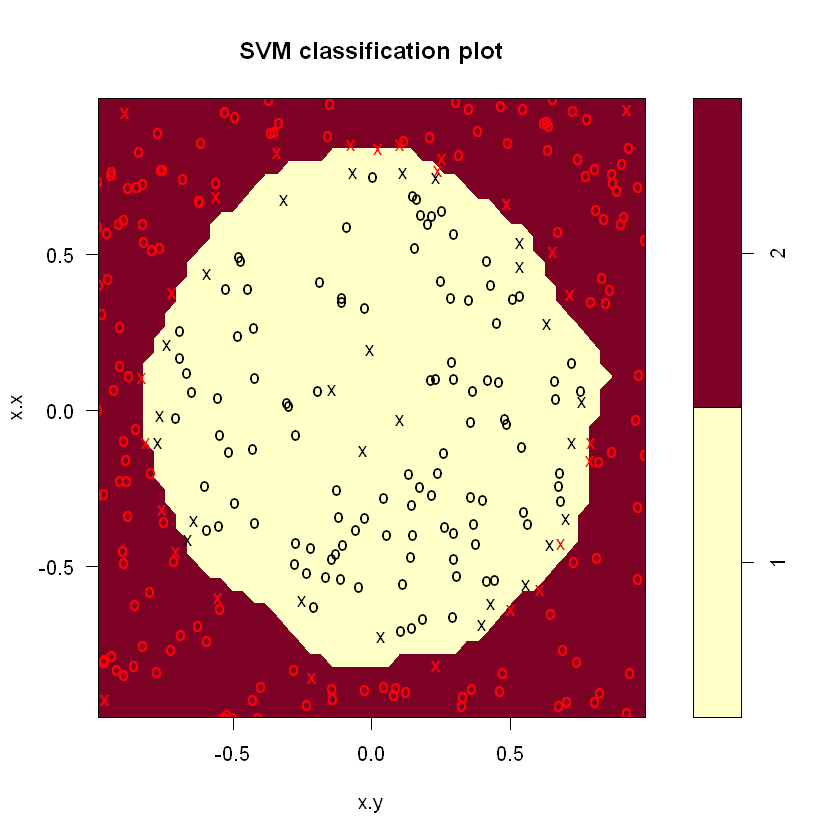

In [7]:
svmfit = svm(y ~ ., data = dat, kernel = "radial", cost = 10, gamma=10, scale = FALSE)
print(svmfit)
plot(svmfit, dat)

# Sobreajuste y Validación


## Definiciones

En el ejemplo anterior vimos que la incorporación del kernel vuelve mas  flexible al modelo, es decir que aumenta su capacidad para ajustar los datos.


>La cantidad de parámetros (grados de libertad) del modelo es un *proxy* de su complejidad. Un modelo más complejo (más parámetros) es en general más flexible.


Sin embargo, si la flexibilidad es excesiva, podríamos aproximar ciertos datos con error cero. Esta situación, en que el modelo ha "memorizado los datos", se conoce como **sobreajuste**.

En la siguiente figura las lineas naranja y azul representan dos modelos que buscan separar los círculos verdes de los diamantes rojos

<img src="img/overfitting2.png" width="300">

El modelo naranjo clasifica mejor pero se ha sobreajustado a los datos.

>Siempre debemos considerar que los datos no son perfectos y que pueden tener ruido. Un modelo sobreajustado "aprende el ruido" y en consecuencia puede desempeñar muy mal sobre datos nuevos: Pierde capacidad de **generalización**.

La siguiente figura esquematiza de forma general la relación entre la complejidad de un modelo, su capacidad de ajuste (error de entrenamiento) y su capacidad de generalización (error en datos aun no observados):

<img src="img/overfitting.png" width="400">

Figura: https://www.d2l.ai/chapter_multilayer-perceptrons/underfit-overfit.html


>En general, mientras más simple (menos complejo) sea el modelo, menos propenso es a sobreajustarse (generaliza mejor).


>Podemos evitar el escenario sobreajustado en modelos complejos utilizando un conjunto de datos de validación o estrategias de regularización.


## Estrategias de Validación

Para combatir el sobreajuste podemos usar **estrategias de validación**, estas se basan en separar el conjunto de datos en dos o más subconjuntos, revisemos dos de ellas.

***Hold-out***

Consiste en separar los datos en conjuntos de entrenamiento, validación y prueba:

- El primero se ocupa para entrenar o ajustar el modelo
- El segundo se utiliza para detectar sobreajuste y calibrar los hiperparámetros del modelo
- El tercero se ocupa para realizar una evaluación final libre de sesgos

La forma más simple de crear estos subconjuntos es permutar aleatoriamente los índices de los elementos y dividir los índices en distintas proporciones. Tipicamente se usa una proporción 60/20/20 o 80/10/10 dependiendo del tamaño de la base de datos original, como muestra el siguiente esquema:

<img src="img/validation1.png" width="500">

El permutar produce un particionamiento aleatorio que busca que cada subconjunto sea **representativo** de la base de datos original. La siguiente figura muestra un esquema iterativo de validación basado en el método *hold-out*:

<img src="img/validation2.png" width="500">


>Usando estos esquemas podemos detectar fácilmente un modelo sobreajustado ya que presentará un buen desempeño en entrenamiento pero un desempeño deficiente en validación.


A continuación se muestra como utilizar la función para separar un conjunto de datos en dos subconjuntos aleatorios de tamaño definido por el usuario. Se utilizan los mismos datos ya generados.

In [8]:
#install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dat, SplitRatio = 0.75)
training_set = subset(dat, split == TRUE)
test_set = subset(dat, split == FALSE)

In [22]:
clasificador = svm(y ~ ., data = training_set, type = 'C-classification',kernel = "radial", cost = 10, scale = FALSE)

In [24]:
y_pred = predict(clasificador, newdata = test_set)
cm = table(test_set$y, y_pred)
cm


   y_pred
     1  2
  1 45  0
  2  1 54

**K-fold**

La validación cruzada o K-fold consisten en separar el conjunto en $K$ particiones y utilizarlas alternadamente para entrenar y validar como muestra el siguiente esquema:

<img src="img/cv.png" width="400">

El caso extremo se conoce como Leave-one-out (LOO), en que se entrena con todos los datos menos uno $N$ veces.

>Las particiones se seleccionan aleatoriamente. También se pueden separar de forma aleatoria estratificada, es decir manteniendo la proporción de clases.



In [29]:
#install.packages("caret")
library(caret)

In [25]:
# para crear los conjuntos se indica la variable dependiente y el nro de particiones
folds = createFolds(training_set$y, k = 10)
# definimos cv como una función que aplicaremos a cada partición
cv = lapply(folds, function(x) { # definición de la función
  # se separa el conjunto de entrenamiento en 10 piezas
  training_fold = training_set[-x, ] # training fold =  training set - su subconjunto de test
  test_fold = training_set[x, ] # subconjunto de test
  # se entrena el clasificador con training_fold
  clasificador= svm(y ~ ., data = training_fold, kernel = "radial", cost = 10, scale = FALSE)
  # se usa subconjunto de test para probar la exactitud del clasificador 
  y_pred = predict(clasificador, newdata = test_fold)
  cm = table(test_fold$y, y_pred)
  accuracy = (cm[1,1] + cm[2,2]) / (cm[1,1] + cm[2,2] + cm[1,2] + cm[2,1])
  return(accuracy)
})

In [26]:
cv

$Fold01
[1] 0.95

$Fold02
[1] 1

$Fold03
[1] 0.95

$Fold04
[1] 0.8947368

$Fold05
[1] 1

$Fold06
[1] 1

$Fold07
[1] 0.9473684

$Fold08
[1] 0.95

$Fold09
[1] 0.952381

$Fold10
[1] 0.95

In [28]:
accuracy = mean(as.numeric(cv))
accuracy

[1] 0.9594486

**Ejercicio 4**: Utilice lo estudiado con alguno de los conjuntos de datos revisados en la sesión anterior.